In [ ]:
# Commands to run before running any code
using Pkg

## 1) Activate and Instantiate the environment

# Pkg.activate("")
# Pkg.instantiate()

## 2) Add and Build the required Packages
# Pkg.add("BinaryProvider")
# Pkg.add("FFMPEG")
Pkg.add("SpecialFunctions")
# Pkg.build("SpecialFunctions")

## 3) If none of the above commands worked, please try using the following command
# using Pkg
# pkg"activate --temp"
# pkg"add Plots"

In [4]:
using Pkg
Pkg.add("SpecialFunctions")
Pkg.build("SpecialFunctions")

   Resolving package versions...
   Installed OpenSpecFun_jll ── v0.5.5+0
   Installed SpecialFunctions ─ v2.3.1
    Updating `C:\Users\mridu\AppData\Local\Temp\jl_KYA8OG\Project.toml`
  [276daf66] + SpecialFunctions v2.3.1
    Updating `C:\Users\mridu\AppData\Local\Temp\jl_KYA8OG\Manifest.toml`
  [276daf66] + SpecialFunctions v2.3.1
  [efe28fd5] + OpenSpecFun_jll v0.5.5+0
Precompiling project...
  ✓ OpenSpecFun_jll
  ✓ SpecialFunctions
  ✓ ColorVectorSpace → SpecialFunctionsExt
  3 dependencies successfully precompiled in 22 seconds. 148 already precompiled.


In [6]:
using Pkg
# packages 
lst = ["DiffEqBase", "DiffEqPhysics", "DifferentialEquations", "Elliptic", "OrdinaryDiffEq", "Printf"]
for i in lst
    Pkg.add(i)
end


   Resolving package versions...
   Installed Accessors ──────────────────────── v0.1.36
   Installed SIMDTypes ──────────────────────── v0.1.0
   Installed EnumX ──────────────────────────── v1.0.4
   Installed Static ─────────────────────────── v0.8.10
   Installed Polyester ──────────────────────── v0.7.12
   Installed RecursiveArrayTools ────────────── v3.13.0
   Installed DiffEqBase ─────────────────────── v6.149.0
   Installed Tricks ─────────────────────────── v0.1.8
   Installed CpuId ──────────────────────────── v0.3.1
   Installed ADTypes ────────────────────────── v0.2.7
   Installed ThreadingUtilities ─────────────── v0.5.2
   Installed ManualMemory ───────────────────── v0.1.8
   Installed ExprTools ──────────────────────── v0.1.10
   Installed SciMLBase ──────────────────────── v2.31.0
   Installed BitTwiddlingConvenienceFunctions ─ v0.1.5
   Installed FunctionWrappersWrappers ───────── v0.1.3
   Installed DiffRules ──────────────────────── v1.15.1
   Installed SciMLStruc

In [64]:
using DiffEqBase
using DiffEqPhysics
using DifferentialEquations
using Elliptic
using OrdinaryDiffEq
using Plots; gr()
using Printf
using Statistics

In [69]:
sol2q(sol) = [sol.u[i][j] for i in 1:length(sol.u), j in 1:length(sol.u[1])÷2]
sol2p(sol) = [sol.u[i][j] for i in 1:length(sol.u), j in length(sol.u[1])÷2+1:length(sol.u[1])]
sol2tqp(sol) = (sol.t, sol2q(sol), sol2p(sol))

# The exact solutions of single pendulums can be expressed by the Jacobian elliptic functions.
sn(u, k) = Jacobi.sn(u, k^2) # the Jacobian sn function

# Define a color list for plotting
colorlist = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
]
cc(k) = colorlist[mod1(k, length(colorlist))]



cc (generic function with 1 method)

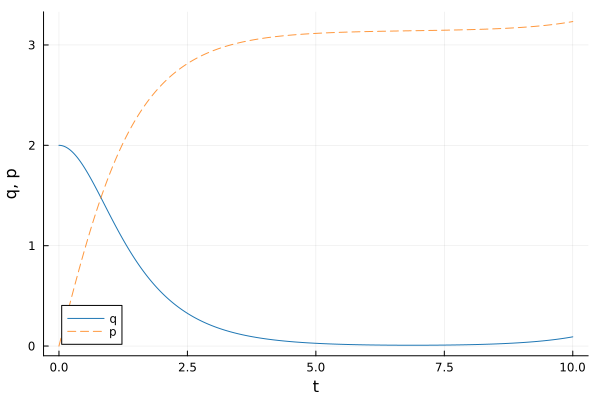

In [74]:
# Plot the solution of a Hamiltonian problem
t, q, p = sol2tqp(sol)
d = size(q)[2]
for j in 1:d
    j_str = d > 1 ? "[$j]" : ""
    plot(t, q[:,j], color=cc(2j-1), label="q$(j_str)", lw=1)
    plot!(t, p[:,j], color=cc(2j), label="p$(j_str)", lw=1, ls=:dash, alpha=0.8)
end
plot!(grid=true)  # Add grid with appropriate linestyle
xlabel!("t")  # Update x-axis label
ylabel!("q, p")  # Update y-axis label
plot!(legend=:bottomleft)

t: [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09, 0.09999999999999999, 0.10999999999999999, 0.11999999999999998, 0.12999999999999998, 0.13999999999999999, 0.15, 0.16, 0.17, 0.18000000000000002, 0.19000000000000003, 0.20000000000000004, 0.21000000000000005, 0.22000000000000006, 0.23000000000000007, 0.24000000000000007, 0.25000000000000006, 0.26000000000000006, 0.2700000000000001, 0.2800000000000001, 0.2900000000000001, 0.3000000000000001, 0.3100000000000001, 0.3200000000000001, 0.3300000000000001, 0.34000000000000014, 0.35000000000000014, 0.36000000000000015, 0.37000000000000016, 0.38000000000000017, 0.3900000000000002, 0.4000000000000002, 0.4100000000000002, 0.4200000000000002, 0.4300000000000002, 0.4400000000000002, 0.45000000000000023, 0.46000000000000024, 0.47000000000000025, 0.48000000000000026, 0.49000000000000027, 0.5000000000000002, 0.5100000000000002, 0.5200000000000002, 0.5300000000000002, 0.5400000000000003, 0.5500000000000003, 0.5600000000000003,

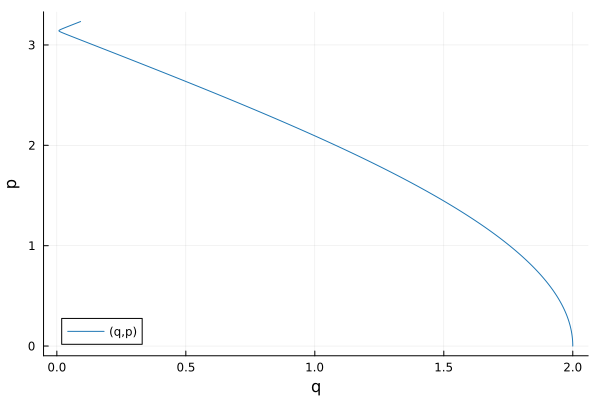

In [75]:
# Plot the solution of a Hamiltonian problem on the 2D phase space
t, q, p = sol2tqp(sol)
println("t: ", t)
println("q: ", q)
println("p: ", p)
d = size(q)[2]
for j in 1:d
    j_str = d > 1 ? "[$j]" : ""
    plot(q[:,j], p[:,j], color=cc(j), label="(q$(j_str),p$(j_str))", lw=1)
end
plot!(grid=true, linestyle=:dot)  # Add grid with appropriate linestyle
xlabel!("q")  # Update x-axis label
ylabel!("p")  # Update y-axis label
plot!(legend=:bottomleft)

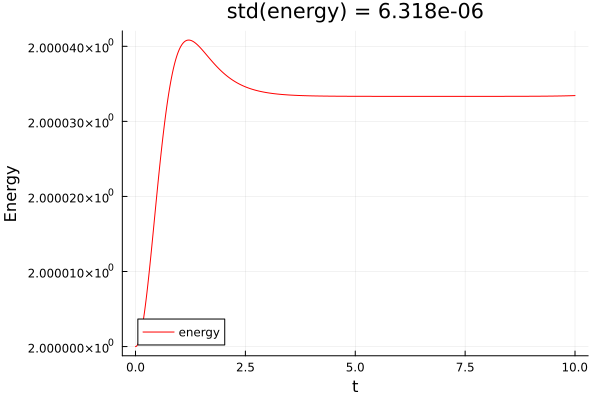

In [76]:
# Plot the energy of a Hamiltonian problem
t, q, p = sol2tqp(sol)
energy = [H(q[i,:], p[i,:], nothing) for i in 1:size(q)[1]]
plot(t, energy, label="energy", color="red", lw=1)
plot!(grid=true, linestyle=:dot)  # Add grid with appropriate linestyle
xlabel!("t")  # Update x-axis label
ylabel!("Energy")  # Update y-axis label
plot!(legend=:bottomleft)
stdenergy_str = @sprintf("%.3e", std(energy))
title!("std(energy) = $stdenergy_str", fontsize=10)  # Update title

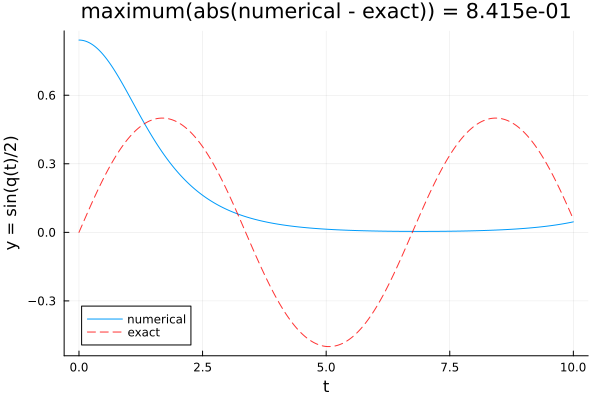

In [78]:
# Plot the numerical and exact solutions of a single pendulum
t, q, p = sol2tqp(sol)
y = sin.(q/2)
y_exact = k*sn.(t, k) # the exact solution
plot(t, y, label="numerical", lw=1)
plot!(t, y_exact, label="exact", lw=1, ls=:dash, alpha=0.8, color="red")
plot!(grid=true)  # Add grid with appropriate linestyle
xlabel!("t")  # Update x-axis label
ylabel!("y = sin(q(t)/2)")  # Update y-axis label
plot!(legend=:bottomleft)
error_str = @sprintf("%.3e", maximum(abs.(y - y_exact)))
title!("maximum(abs(numerical - exact)) = $error_str", fontsize=10)

In [ ]:
# # Plot solution and energy
# function plotsolenergy(H, integrator, Δt, sol::ODESolution)
#     integrator_str = replace("$integrator", r"^[^.]*\." => "")

#     p1 = plot()
#     plotsol(sol)
#     p2 = plot()
#     plotsol2(sol)
#     p3 = plot()
#     plotenergy(H, sol)

#     plot(p1, p2, p3, layout=(3,1))
#     title!("=====    $integrator_str,   Δt = $Δt    =====") 
# end

# # Solve a single pendulum
# function singlependulum(k, integrator, Δt; t0 = 0.0, t1 = 100.0)
#     H(p,q,params) = p[1]^2/2 - cos(q[1]) + 1
#     q0 = [0.0]
#     p0 = [2k]
#     prob = HamiltonianProblem(H, p0, q0, (t0, t1))

#     integrator_str = replace("$integrator", r"^[^.]*\." => "")
#     @printf("%-25s", "$integrator_str:")
#     sol = solve(prob, integrator, dt=Δt)
#     @time sol = solve(prob, integrator, dt=Δt)

#     plotsolenergy(H, integrator, Δt, sol)
# end


In [81]:
# Function to separate generalized coordinates
sol2q(sol) = [sol.u[i][j] for i in 1:length(sol.u), j in 1:length(sol.u[1])÷2]

# Function to separate generalized momenta
sol2p(sol) = [sol.u[i][j] for i in 1:length(sol.u), j in length(sol.u[1])÷2+1:length(sol.u[1])]

# Function to combine time, q, and p
sol2tqp(sol) = (sol.t, sol2q(sol), sol2p(sol))

# Plotting function for solution trajectory
function plotsol(sol)
  t, q, p = sol2tqp(sol)
  d = size(q)[2]
  for j in 1:d
    j_str = d > 1 ? "[$j]" : ""
    plot(t, q[:,j], color=cc(2j-1), label="q$(j_str)", lw=1)
    plot!(t, p[:,j], color=cc(2j), label="p$(j_str)", lw=1, ls=:dash, alpha=0.8)
  end
  plot!(grid=true)
  xlabel!("t")
  ylabel!("q, p")
  return plot!(legend=:bottomleft)
end

# Plotting function for phase space
function plotsol2(sol)
  t, q, p = sol2tqp(sol)
  d = size(q)[2]
  for j in 1:d
    j_str = d > 1 ? "[$j]" : ""
    plot(q[:,j], p[:,j], color=cc(j), label="(q$(j_str),p$(j_str))", lw=1)
  end
  plot!(grid=true, linestyle=:dot)
  xlabel!("q")
  ylabel!("p")
   return plot!(legend=:bottomleft)
end

# Plotting function for energy
function plotsenergy1(sol, H)
  t, q, p = sol2tqp(sol)
  energy = [H(q[i,:], p[i,:], nothing) for i in 1:size(q)[1]]
  plot(t, energy, label="energy", color="red", lw=1)
  plot!(grid=true, linestyle=:dot)
  xlabel!("t")
  ylabel!("Energy")
  stdenergy_str = @sprintf("%.3e", std(energy))
  title!("std(energy) = $stdenergy_str", fontsize=10)
  return plot!(legend=:bottomleft)
  
end

# Combined plotting function
function plotsolenergy(H, integrator, Δt, sol)
  integrator_str = replace("$integrator", r"^[^.]*\." => "")

  p1 = plot()
  plotsol(sol)

  p2 = plot()
  plotsol2(sol)

  p3 = plot()
  plotsenergy1(sol, H)
  title!("=====  $integrator_str,  Δt = $Δt  =====")

  return plot(p1, p2, p3, layout=(3,1))
  
end

# Single pendulum function with plotting
function singlependulum(k, integrator, Δt; t0 = 0.0, t1 = 100.0)
  H(p,q,params) = p[1]^2/2 - cos(q[1]) + 1
  q0 = [0.0]
  p0 = [2k]
  prob = HamiltonianProblem(H, p0, q0, (t0, t1))

  integrator_str = replace("$integrator", r"^[^.]*\." => "")
  @printf("%-25s", "$integrator_str:")
  sol = solve(prob, integrator, dt=Δt)
  @time sol = solve(prob, integrator, dt=Δt)

  plotsolenergy(H, integrator, Δt, sol)
end


singlependulum (generic function with 1 method)

VelocityVerlet(;):         0.000603 seconds (2.89 k allocations: 205.375 KiB)
t: [-20.0, -19.9, -19.799999999999997, -19.699999999999996, -19.599999999999994, -19.499999999999993, -19.39999999999999, -19.29999999999999, -19.19999999999999, -19.099999999999987, -18.999999999999986, -18.899999999999984, -18.799999999999983, -18.69999999999998, -18.59999999999998, -18.49999999999998, -18.399999999999977, -18.299999999999976, -18.199999999999974, -18.099999999999973, -17.99999999999997, -17.89999999999997, -17.79999999999997, -17.699999999999967, -17.599999999999966, -17.499999999999964, -17.399999999999963, -17.29999999999996, -17.19999999999996, -17.09999999999996, -16.999999999999957, -16.899999999999956, -16.799999999999955, -16.699999999999953, -16.59999999999995, -16.49999999999995, -16.39999999999995, -16.299999999999947, -16.199999999999946, -16.099999999999945, -15.999999999999945, -15.899999999999945, -15.799999999999946, -15.699999999999946, -15.599999999999946, -15.499999999999

┌ Warning: linestyle -- is unsupported with Plots.GRBackend(). Choose from: [:auto, :dash, :dashdot, :dashdotdot, :dot, :solid]
└ @ Plots C:\Users\mridu\.julia\packages\Plots\Pe7wF\src\args.jl:1573


; 0.22934414107699652; 0.26849258350540656; 0.30515587688041135; 0.3389629038320403; 0.3695607032102489; 0.396619939737549; 0.4198408391789989; 0.4389593043127703; 0.45375287302487693; 0.4640461534479325; 0.4697153777548298; 0.4706917580297126; 0.46696340227386834; 0.45857564932437456; 0.44562979777704914; 0.4282803230962065; 0.40673078572561405; 0.3812287195240845; 0.3520598458106218; 0.31954197954824687; 0.2840189810193446; 0.24585506296345724; 0.2054296965948854; 0.16313327869507604; 0.11936363475465014; 0.07452334774077535; 0.02901782483376248; -0.016746049925815208; -0.06236087761931182; -0.10741955232921653; -0.15151615822671516; -0.1942471922236821; -0.23521332276923756; -0.2740218515175855; -0.3102899842188643; -0.343648943007192; -0.3737488684987382; -0.40026437266707504; -0.42290051980010424; -0.4413989414896302; -0.45554374122851954; -0.46516682235501433; -0.47015228488452665; -0.47043958363578864; -0.46602521903252336; -0.45696283569343316; -0.4433617214763881; -0.425383818

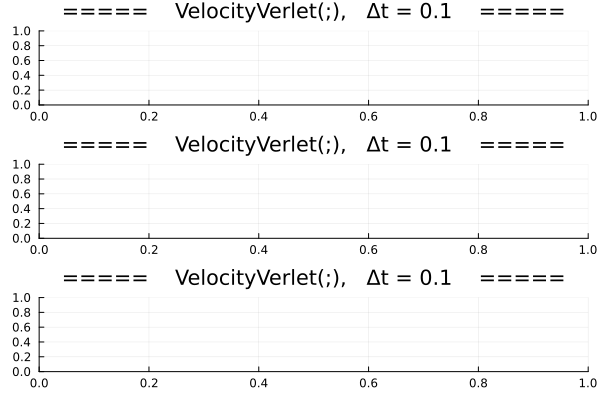

In [82]:
k = rand()
integrator = VelocityVerlet()
Δt = 0.1
singlependulum(k, integrator, Δt;  t0=-20.0, t1=20.0)